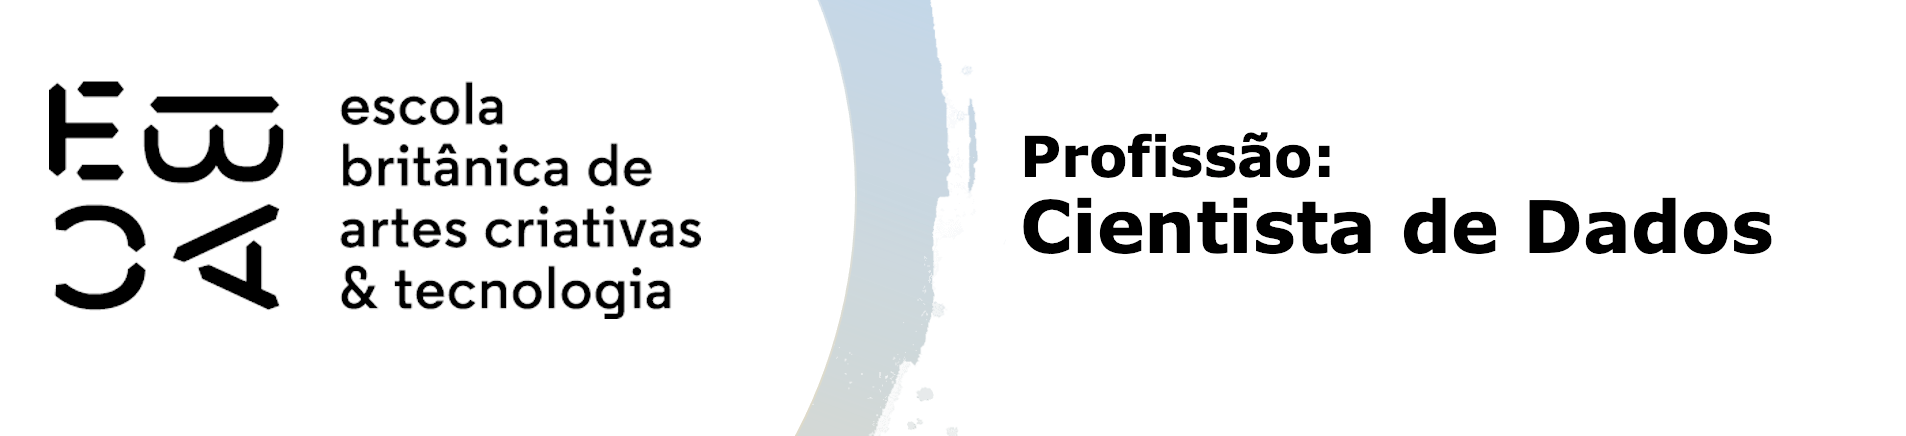

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

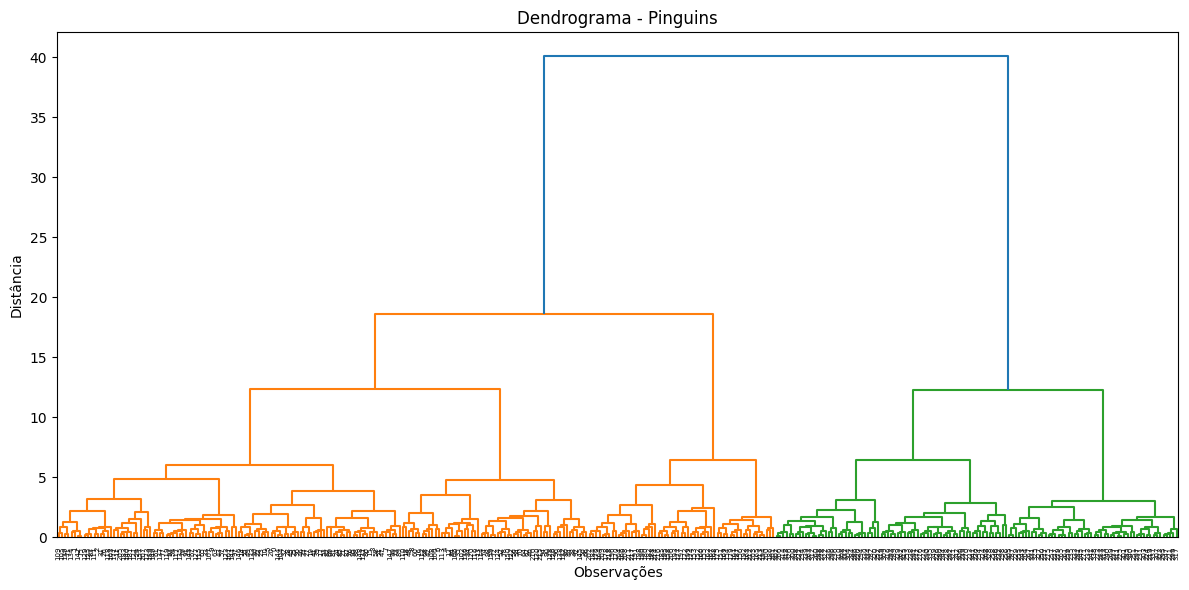

         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
1                 47.50          14.98             217.19      5076.02
2                 49.75          18.60             197.11      3810.09
3                 39.15          18.29             189.90      3675.77


In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

scaler = StandardScaler()
peng_scaled = scaler.fit_transform(peng_num)

linked = linkage(peng_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrograma - Pinguins')
plt.xlabel('Observações')
plt.ylabel('Distância')
plt.tight_layout()
plt.show()

clusters = fcluster(linked, t=3, criterion='maxclust')

peng_num['Cluster'] = clusters

peng['Cluster'] = peng_num['Cluster']

print(peng_num.groupby('Cluster').mean().round(2))


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [5]:
pd.crosstab(peng['Cluster'], peng['species'])

species,Adelie,Chinstrap,Gentoo
Cluster,,,
1.0,0,0,123
2.0,0,57,0
3.0,151,11,0


         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
1.0               47.50          14.98             217.19      5076.02
2.0               49.75          18.60             197.11      3810.09
3.0               39.15          18.29             189.90      3675.77


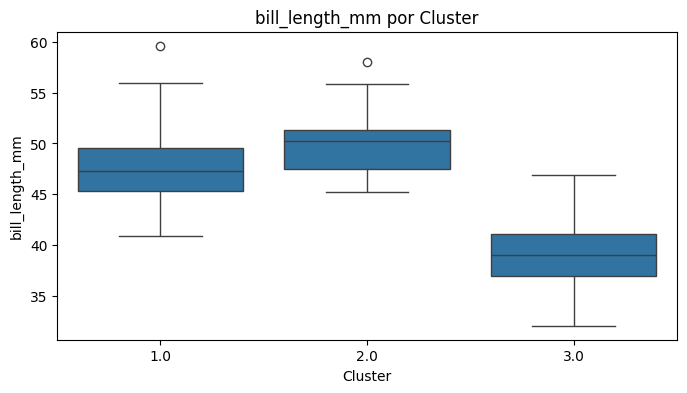

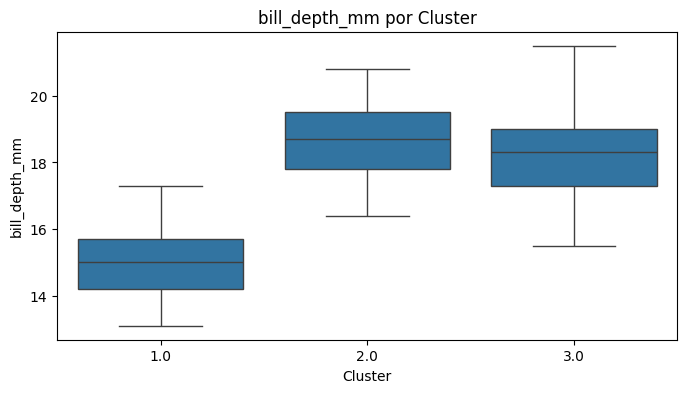

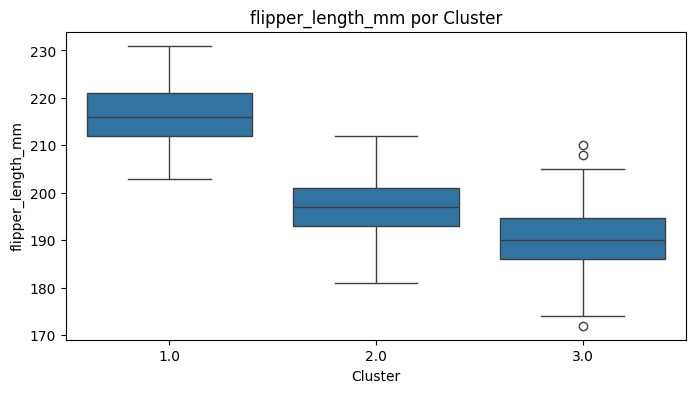

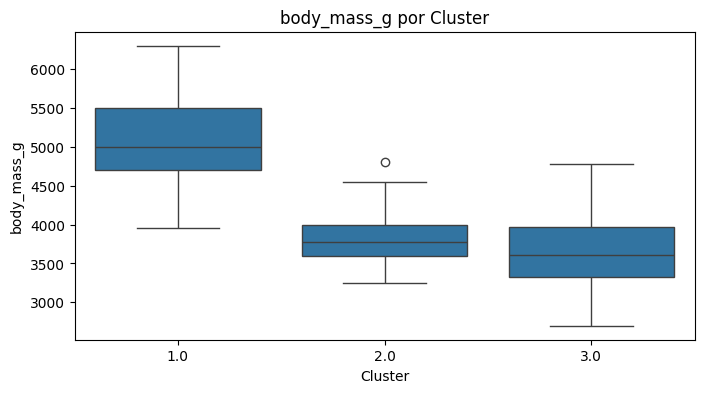

In [10]:
print(peng.groupby('Cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean().round(2))

quant_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for var in quant_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=var, data=peng)
    plt.title(f'{var} por Cluster')
    plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [12]:
from scipy.cluster.hierarchy import fcluster

clusters_5 = fcluster(linked, t=5, criterion='maxclust')

peng_num['Cluster_5'] = clusters_5

peng_sub = peng.loc[peng_num.index].copy()
peng_sub['Cluster_5'] = clusters_5

print("Quantidade por espécie e cluster:")
print(pd.crosstab(peng_sub['Cluster_5'], peng_sub['species']))

print("\nQuantidade por espécie, sexo e cluster:")
print(pd.crosstab([peng_sub['Cluster_5'], peng_sub['sex']], peng_sub['species']))

Quantidade por espécie e cluster:
species    Adelie  Chinstrap  Gentoo
Cluster_5                           
1               0          0      52
2               0          0      71
3               0         57       0
4              54          3       0
5              97          8       0

Quantidade por espécie, sexo e cluster:
species           Adelie  Chinstrap  Gentoo
Cluster_5 sex                              
1         Female       0          0      49
2         Female       0          0       9
          Male         0          0      61
3         Female       0         23       0
          Male         0         34       0
4         Female       1          3       0
          Male        52          0       0
5         Female      72          8       0
          Male        21          0       0


Ao aumentar o número de grupos para 5, o agrupamento hierárquico revelou nuances importantes:

A espécie Gentoo foi separada em dois grupos, possivelmente refletindo diferenças entre machos e fêmeas.

A espécie Adelie também foi dividida em dois grupos, que se alinham fortemente com o sexo dos pinguins, indicando diferenças corporais importantes entre machos e fêmeas.

Chinstrap permaneceu em um grupo mais homogêneo.

Dessa forma, o agrupamento capturou padrões naturais presentes nos dados, tanto em termos de espécies quanto de diferenças sexuais dentro delas.